#1. Librerias

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

#2. Base de datos

In [13]:
base=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,22.5,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [14]:
bd=base.values
bd

array([[0., 3., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 3., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

#3. Variables

In [15]:
X=bd[:,1:10]
X

array([[ 3. ,  1. , 22. , ...,  0. ,  0. ,  1. ],
       [ 1. ,  0. , 38. , ...,  1. ,  0. ,  0. ],
       [ 3. ,  0. , 26. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 3. ,  0. , 22.5, ...,  0. ,  0. ,  1. ],
       [ 1. ,  1. , 26. , ...,  1. ,  0. ,  0. ],
       [ 3. ,  1. , 32. , ...,  0. ,  1. ,  0. ]])

In [16]:
Y=bd[:,0]
Y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

#4. Redimensionamiento

In [17]:
X_redimensionado=preprocessing.MinMaxScaler().fit_transform(X)
X_redimensionado

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.27745665, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 1.        ,
        0.        ]])

#5. Entrenamiento, validación y test

In [18]:
X_train,X_val_and_test,Y_train,Y_val_and_test=train_test_split(X_redimensionado,Y,test_size=0.4)
X_val,X_test,Y_val,Y_test=train_test_split(X_val_and_test,Y_val_and_test,test_size=0.5)

#6. Red Neuronal

In [19]:
modelo=Sequential([Dense(50,activation='relu',input_shape=(9,)),Dense(50,activation='relu'),Dense(1,activation='sigmoid')])
modelo.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
proceso=modelo.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
17/17 [==============================] - 1s 15ms/step - loss: 0.6966 - accuracy: 0.4850 - val_loss: 0.6779 - val_accuracy: 0.6067
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6568 - accuracy: 0.6423 - val_loss: 0.6648 - val_accuracy: 0.5449
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.6442 - val_loss: 0.6589 - val_accuracy: 0.5449
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.6442 - val_loss: 0.6562 - val_accuracy: 0.5449
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6065 - accuracy: 0.6442 - val_loss: 0.6546 - val_accuracy: 0.5449
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5984 - accuracy: 0.6442 - val_loss: 0.6535 - val_accuracy: 0.5449
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.6442 - val_loss: 0.6523 - val_accuracy: 0.5449
Epoch 8/100


#7. Grafico

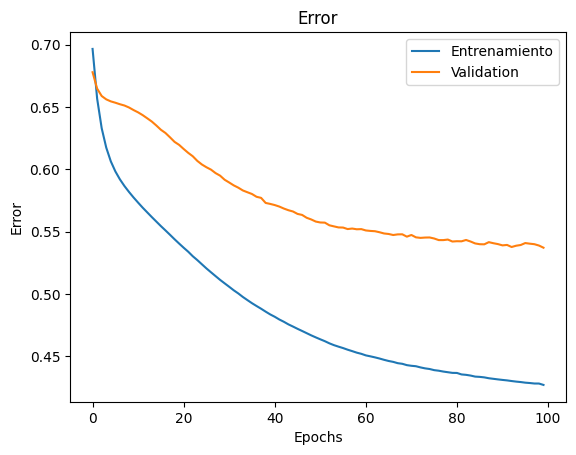

In [20]:
#Grafico de error
plt.plot(proceso.history['loss'])
plt.plot(proceso.history['val_loss'])
plt.title('Error')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento','Validation'])
plt.show()

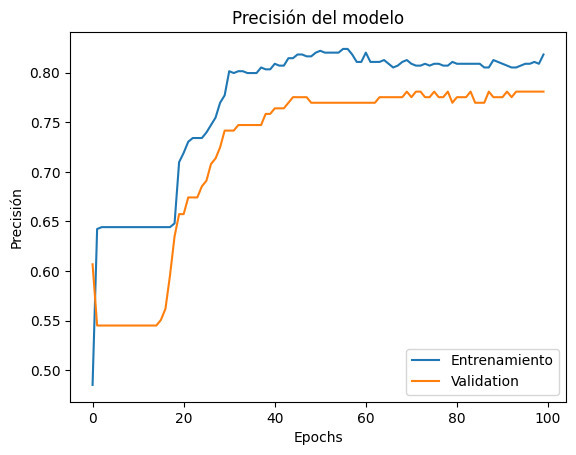

In [21]:
#Grafico de aprendizaje
plt.plot(proceso.history['accuracy'])
plt.plot(proceso.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento','Validation'])
plt.show()

#8. Calificación del modelo

In [22]:
Y_pred=modelo.predict(X_test)
rmse=np.sqrt(np.mean(Y_pred-Y_test)**2)
calificacion=(1-rmse)*100
calificacion

6/6 [==============================] - 0s 2ms/step


96.72714136749006

In [ ]:
Y_pred

#9.1 Nueva observación

In [24]:
fila_adicional=np.array([3,0,21,1,0,55,1,0,0])

#9.2 Redimensionamiento

In [25]:
fila_adicional_redimensionado=preprocessing.MinMaxScaler().fit_transform(fila_adicional.reshape(-1,1))

#9.3 Nueva Matriz x

In [26]:
X_test_nuevo=np.vstack([X_test,np.transpose(fila_adicional_redimensionado)])

#9.4 Predicción

In [27]:
Y_pred_nuevo=modelo.predict(X_test_nuevo)
Y_pred_nuevo

6/6 [==============================] - 0s 4ms/step


array([[0.17320067],
       [0.07606848],
       [0.07746564],
       [0.16157064],
       [0.09373818],
       [0.7635603 ],
       [0.8732745 ],
       [0.7796587 ],
       [0.16341937],
       [0.44232702],
       [0.07167701],
       [0.86866254],
       [0.8695558 ],
       [0.62674916],
       [0.16196412],
       [0.37233958],
       [0.06862476],
       [0.16768888],
       [0.8734634 ],
       [0.594831  ],
       [0.07174063],
       [0.16301146],
       [0.66746056],
       [0.16647346],
       [0.8720948 ],
       [0.11169777],
       [0.29369903],
       [0.5197046 ],
       [0.17179735],
       [0.17122045],
       [0.16706058],
       [0.15791751],
       [0.17429392],
       [0.76061445],
       [0.0795159 ],
       [0.07805658],
       [0.07661442],
       [0.60409445],
       [0.07718942],
       [0.07222831],
       [0.08890072],
       [0.17077005],
       [0.17064   ],
       [0.07932862],
       [0.44507343],
       [0.07260437],
       [0.16792539],
       [0.613